In [1]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\Akshay\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Question Generation Model

## Data Cleaning

In [2]:
# ds1 = load_dataset("jordane95/msmarco-passage-corpus-with-query")
# ds2 = load_dataset("SetFit/insincere-questions")
ds3 = load_dataset("anon-betterbench/betterbench-b1-all-questions")

In [17]:
df3 = ds3['train'].to_pandas()

In [18]:
df3.head()

title  \
0  Three ways McKinsey is partnering to transform...   
1  Three ways McKinsey is partnering to transform...   
2  Three ways McKinsey is partnering to transform...   
3  Three ways McKinsey is partnering to transform...   
4  Three ways McKinsey is partnering to transform...   

                             chunk_uuid  chunk_location_id  chunk_size  \
0  2199f6af-4f4f-46da-ab11-a5d164d3e92d                  0        1354   
1  2199f6af-4f4f-46da-ab11-a5d164d3e92d                  0        1354   
2  2199f6af-4f4f-46da-ab11-a5d164d3e92d                  0        1354   
3  2199f6af-4f4f-46da-ab11-a5d164d3e92d                  0        1354   
4  2199f6af-4f4f-46da-ab11-a5d164d3e92d                  0        1354   

                                               chunk  \
0  September 27, 2024A projected 80 percent of si...   
1  September 27, 2024A projected 80 percent of si...   
2  September 27, 2024A projected 80 percent of si...   
3  September 27, 2024A projected 80 percent of si...   
4  September 27, 2024A projected 80 percent of si...   

                                             summary document_type  \
0  This document highlights McKinsey's efforts to...     corporate   
1  This document highlights McKinsey's efforts to...     corporate   
2  This document highlights McKinsey's efforts to...     corporate   
3  This document highlights McKinsey's efforts to...     corporate   
4  This document highlights McKinsey's efforts to...     corporate   

        document_name                    unique_document_id  \
0  mckinsey_blog_post  f3370f14-180d-4375-8255-7c41417a61c9   
1  mckinsey_blog_post  f3370f14-180d-4375-8255-7c41417a61c9   
2  mckinsey_blog_post  f3370f14-180d-4375-8255-7c41417a61c9   
3  mckinsey_blog_post  f3370f14-180d-4375-8255-7c41417a61c9   
4  mckinsey_blog_post  f3370f14-180d-4375-8255-7c41417a61c9   

                                         source_text  ...  \
0  # Three ways McKinsey is partnering to transfo...  ...   
1  # Three ways McKinsey is partnering to transfo...  ...   
2  # Three ways McKinsey is partnering to transfo...  ...   
3  # Three ways McKinsey is partnering to transfo...  ...   
4  # Three ways McKinsey is partnering to transfo...  ...   

                                           reasoning           kind  \
0  The chunk describes the Mentu program as being...     analytical   
1  The chunk explicitly states that the lack of r...     analytical   
2  This question encourages the application of in...    application   
3  This question encourages the exploration of va...    application   
4  Understanding how AI is utilized in the Mentu ...  clarification   

  estimated_difficulty generating_model  \
0                    3      gpt-4o-mini   
1                    4      gpt-4o-mini   
2                    4      gpt-4o-mini   
3                    3      gpt-4o-mini   
4                    3      gpt-4o-mini   

                           citation_match_statistics  \
0  {'match_ratio_mean': 1.0, 'match_ratio_median'...   
1  {'match_ratio_mean': 1.0, 'match_ratio_median'...   
2  {'match_ratio_mean': 1.0, 'match_ratio_median'...   
3  {'match_ratio_mean': 1.0, 'match_ratio_median'...   
4  {'match_ratio_mean': 1.0, 'match_ratio_median'...   

                    question_identifier previous_chunk_uuid  \
0  6d19739f-9d9a-419a-bb36-00bfc9fe0c6d                None   
1  633b998e-1809-44cc-811a-0bc822cf4634                None   
2  2fd7aeaf-7034-49f2-aa2b-f5253165157b                None   
3  45af7741-6cda-4241-849b-0254c6fbc136                None   
4  42e72de5-47f3-4cf7-a020-5857d64396a0                None   

                        previous_chunk                       next_chunk_uuid  \
0  No previous chunk, end of document.  89de7b59-4f68-486e-b800-ec9956b3cd8f   
1  No previous chunk, end of document.  89de7b59-4f68-486e-b800-ec9956b3cd8f   
2  No previous chunk, end of document.  89de7b59-4f68-486e-b800-ec9956b3cd8f   
3  No previous chunk, end of document. 

In [19]:
df3 = df3[["title","chunk","document_type","document_analysis","chunk_analysis",
           "potential_question_directions","best_direction","question","answer","kind"]]
df3 = df3[df3["kind"] != "true-false"]
df3.reset_index(inplace = True)
df3.drop("index",axis = 1,inplace = True)

In [20]:
df3.head()

title  \
0  Three ways McKinsey is partnering to transform...   
1  Three ways McKinsey is partnering to transform...   
2  Three ways McKinsey is partnering to transform...   
3  Three ways McKinsey is partnering to transform...   
4  Three ways McKinsey is partnering to transform...   

                                               chunk document_type  \
0  September 27, 2024A projected 80 percent of si...     corporate   
1  September 27, 2024A projected 80 percent of si...     corporate   
2  September 27, 2024A projected 80 percent of si...     corporate   
3  September 27, 2024A projected 80 percent of si...     corporate   
4  September 27, 2024A projected 80 percent of si...     corporate   

                                   document_analysis  \
0  The document discusses McKinsey's initiatives ...   
1  The document outlines McKinsey's strategic par...   
2  The document discusses McKinsey's initiatives ...   
3  The document discusses McKinsey's initiatives ...   
4  The document discusses McKinsey's initiatives ...   

                                      chunk_analysis  \
0  This chunk highlights the alarming statistic t...   
1  The chunk presents a critical issue in Latin A...   
2  This chunk highlights the alarming statistic t...   
3  This chunk highlights the alarming statistic t...   
4  This chunk highlights the alarming statistic t...   

                       potential_question_directions  \
0  [What are the implications of the statistic re...   
1  [What challenges do students in Latin America ...   
2  [How could the Mentu program be adapted for us...   
3  [How could the Mentu program be adapted for us...   
4  [What specific skills does the Mentu program a...   

                                      best_direction  \
0  The best question to ask is: 'How does the Men...   
1  The best question to ask is: 'What potential l...   
2  The best question to ask is: 'How can the succ...   
3  The best question to ask is: 'What strategies ...   
4  The best question to ask is: 'How does the Men...   

                                            question  \
0  How does the Mentu program aim to engage stude...   
1  What potential long-term effects could the lac...   
2  How can the success of Mentu in Colombia infor...   
3  What strategies could be implemented to increa...   
4  How does the Mentu program utilize AI in teach...   

                                              answer           kind  
0  The Mentu program aims to engage students by p...     analytical  
1  The lack of reading comprehension among sixth ...     analytical  
2  The success of Mentu can inform educational st...    application  
3  Strategies to increase student engagement in p...    application  
4  The Mentu program uses AI to create an engagin...  clarification

In [21]:
df3.groupby("document_type").count()

title  chunk  document_analysis  chunk_analysis  \
document_type                                                    
corporate      21245  21245              21245           21245   
financial       5141   5141               5141            5141   
government     96246  96246              96246           96246   
health         35368  35368              35368           35368   
legal          56152  56152              56152           56152   
misc           19469  19469              19469           19469   
news            4976   4976               4976            4976   
research       55936  55936              55936           55936   

               potential_question_directions  best_direction  question  \
document_type                                                            
corporate                              21245           21245     21245   
financial                               5141            5141      5141   
government                             96246           96246     96246   
health                                 35368           35368     35368   
legal                                  56152           56152     56152   
misc                                   19469           19469     19469   
news                                    4976            4976      4976   
research                               55936           55936     55936   

               answer   kind  
document_type                 
corporate       21245  21245  
financial        5141   5141  
government      96246  96246  
health          35368  35368  
legal           56152  56152  
misc            19469  19469  
news             4976   4976  
research        55936  55936

In [22]:
#analytical application clarification conceptual counterfactual edge case factual false premise open-ended	true-false

In [23]:
#Removed since this kind doesnt contains questions.
df3[df3["kind"] == "true-false"]["potential_question_directions"]

Series([], Name: potential_question_directions, dtype: object)

In [24]:
import re
def clean_latex(text):
    # Remove LaTeX commands like {\\displaystyle}, {\\text{}}, etc.
    cleaned_text = re.sub(r'\\displaystyle|\\text\{.*?\}', '', text)
    
    # Remove any LaTeX curly braces and unnecessary whitespaces
    cleaned_text = re.sub(r'\\[a-z]+|{|}', '', cleaned_text)
    
    # Replace LaTeX-specific representations like \\dots with their equivalent
    cleaned_text = re.sub(r'\\dots', '...', cleaned_text)
    
    # Remove multiple spaces introduced by LaTeX removal
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    return cleaned_text

In [25]:
# df3["chunk"] = [clean_latex(i) for i in list(df3["chunk"])]

In [26]:
temp = df3[df3["document_type"] == "research"]
temp.reset_index(inplace=True)

In [27]:
random_num = [1,20,100,500,1000,2000,5000,10000,20000,21000]
for i in random_num:
    print(temp["chunk"][i])
    print()
    print(temp["potential_question_directions"][i])
    print(temp["kind"][i])
    print()

% Template for Blind SLT-2024 paper; to be used with: % spconf.sty - ICASSP/ICIP LaTeX style file, and % IEEEbib.bst - IEEE bibliography style file. % -------------------------------------------------------------------------- % Source file for this paper's figures are here: https://docs.google.com/presentation/d/1z9X-JeSFIzI1VpzOLs2WTltX1I03vqQiLkUnE8YEBFE/edit?usp=sharing \documentclass{article} \usepackage{spconf,amsmath,graphicx} \usepackage{amsfonts} \usepackage{verbatim, tcolorbox} \usepackage{multicol} \usepackage{multirow} \usepackage{graphicx} \usepackage{hyperref} % Example definitions.

[]
application

% -------------------- \def\x{{\mathbf x}} \def\L{{\cal L}} \newcommand{\dilek}[1]{\textcolor{red}{[\textbf{Dilek:} #1]}} \newcommand{\suvodip}[1]{\textcolor{green}{[\textbf{SD:} #1]}} \newcommand{\jenny}[1]{\textcolor{blue} {[\textbf{Jenny:} #1]}} \title{Confidence Estimation for LLM-Based Dialogue State Tracking} \name{Yi-Jyun Sun, Suvodip Dey, Dilek Hakkani-T√ºr, Gokhan Tur 

In [32]:
from transformers import BartForConditionalGeneration, BartTokenizer, TrainingArguments
from tqdm import tqdm
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')
tokenizedLengthList = []
for chunk in tqdm(list(df3["chunk"])):
    input_tokenized = tokenizer(chunk,return_tensors='pt')
    tokenizedLength = len(input_tokenized["input_ids"][0])
    tokenizedLengthList.append(tokenizedLength)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 294533/294533 [05:46<00:00, 850.58it/s] 


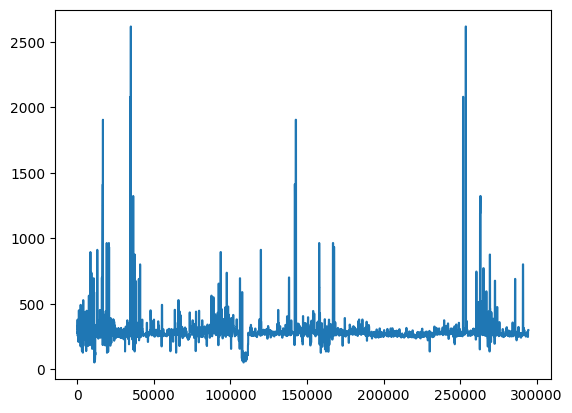

In [52]:
plt.plot(tokenizedLengthList)

In [50]:
df3["chunkTokenLength"] = tokenizedLengthList

In [56]:
tokenizedLengthList = []
for question in tqdm(list(df3["potential_question_directions"])):
    input_tokenized = tokenizer(str(question),return_tensors='pt')
    tokenizedLength = len(input_tokenized["input_ids"][0])
    tokenizedLengthList.append(tokenizedLength)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 294533/294533 [01:56<00:00, 2529.97it/s]


In [57]:
plt.plot(tokenizedLengthList)

In [58]:
df3["questionTokenLength"] = tokenizedLengthList

In [61]:
df3 = df3[df3["questionTokenLength"]<220]

In [63]:
df3 = df3[df3["chunkTokenLength"] < 1000]

In [65]:
df3.reset_index(inplace=True)

In [76]:
df3.sample(frac = 1)
df3.reset_index(inplace=True)
df3.drop("index",axis = 1,inplace = True)

C:\Users\Akshay\AppData\Local\Temp\ipykernel_7612\766189919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop("index",axis = 1,inplace = True)


In [78]:
df3.to_csv("../Data/CleanedDatasets/QuestionGenerator.csv")

## Testing the model

In [2]:
df3 = pd.read_csv("../Data/CleanedDatasets/QuestionGenerator.csv")

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3["chunk"],df3["potential_question_directions"], test_size=0.1, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test, test_size=0.5, random_state=42)

In [4]:
from transformers import BartForConditionalGeneration, BartTokenizer
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_name = '../Saved_Models/QuestionGenerator/fine-tuned-bert-sentiment_{}'.format("2024_11_18_1")
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)
model = model.to(device)

In [15]:
li = [110,20,50,100,345]
for idx in li:
    input_text = X_test.tolist()[idx]
    # print(input_text)
    # print()
    input_ids = tokenizer.encode(input_text, return_tensors='pt').to(device)
    output = model.generate(
        input_ids, 
        max_length=220, 
        num_beams=1, 
        early_stopping=True, 
        no_repeat_ngram_size=2,  # Prevent repeating n-grams
        num_return_sequences=1,  # Number of sequences to return
        temperature=1,  # Sampling temperature
        top_k=0,  # Top-K sampling
        top_p=1.0  # Top-p (nucleus) sampling
    )
    response = tokenizer.decode(output[0], skip_special_tokens=True)
    # print("True Answer",y_test.tolist()[idx])
    print("Pred Answer:", response)
    print()

Pred Answer: ['What are the limitations of naive fine-tuning according to human evaluators?'
 'How does the preference agent perform without access to zero-shot baseline information?']

Pred Answer: ["What is the dissent's approach to historical analysis in the context of the Second Amendment?"
 'How does the author argue that historical laws were inadequate in addressing domestic violence?'
 "What are the implications of a rigid adherence to history in constitutional interpretation, according to the text?"]

Pred Answer: ['What is the difference between LATE and ITT in the context of this study?'
 'Why are the coefficients on dietary diversity measures statistically insignificant in LARA?']

Pred Answer: ['What are the key features of the Sienna modeling framework that make it suitable for large-scale modeling and validation?'
 'How does the use of Julia and JuMP in the Grid Analysis and Visualization Interface enhance the capabilities of Sienza?']

Pred Answer: ["What is the signific

In [26]:
query = "The architecture of a generic GNN implements the following fundamental layers:[6]Permutation equivariant: a permutation equivariant layer maps a representation of a graph into an updated representation of the same graph. In the literature, permutation equivariant layers are implemented via pairwise message passing between graph nodes.[6][11] Intuitively, in a message passing layer, nodes update their representations by aggregating the messages received from their immediate neighbours. As such, each message passing layer increases the receptive field of the GNN by one hop.Local pooling: a local pooling layer coarsens the graph via downsampling. Local pooling is used to increase the receptive field of a GNN, in a similar fashion to pooling layers in convolutional neural networks. Examples include k-nearest neighbours pooling, top-k pooling,[26] and self-attention pooling.[27]Global pooling: a global pooling layer, also known as readout layer, provides fixed-size representation of the whole graph. The global pooling layer must be permutation invariant, such that permutations in the ordering of graph nodes and edges do not alter the final output.[28] Examples include element-wise sum, mean or maximum.It has been demonstrated that GNNs cannot be more expressive than the Weisfeiler‚ÄìLeman Graph Isomorphism Test.[29][30] In practice, this means that there exist different graph structures (e.g., molecules with the same atoms but different bonds) that cannot be distinguished by GNNs. More powerful GNNs operating on higher-dimension geometries such as simplicial complexes can be designed.[31][32][10] As of 2022, whether or not future architectures will overcome the message passing primitive is an open research question.[11]"

In [28]:
input_text = query
print(input_text)
print()
input_ids = tokenizer.encode(input_text, return_tensors='pt').to(device)
output = model.generate(
    input_ids, 
    max_length=220, 
    num_beams=5, 
    early_stopping=True, 
    no_repeat_ngram_size=2,  # Prevent repeating n-grams
    num_return_sequences=1,  # Number of sequences to return
    temperature=0.7,  # Sampling temperature
    top_k=50,  # Top-K sampling
    top_p=0.9  # Top-p (nucleus) sampling
)
response = tokenizer.decode(output[0], skip_special_tokens=True)
# print("True Answer",y_test.tolist()[idx])
print("Pred Answer:", response)
print()

The architecture of a generic GNN implements the following fundamental layers:[6]Permutation equivariant: a permutation equivariant layer maps a representation of a graph into an updated representation of the same graph. In the literature, permutation equivariant layers are implemented via pairwise message passing between graph nodes.[6][11] Intuitively, in a message passing layer, nodes update their representations by aggregating the messages received from their immediate neighbours. As such, each message passing layer increases the receptive field of the GNN by one hop.Local pooling: a local pooling layer coarsens the graph via downsampling. Local pooling is used to increase the receptive field of a GNN, in a similar fashion to pooling layers in convolutional neural networks. Examples include k-nearest neighbours pooling, top-k pooling,[26] and self-attention pooling.[27]Global pooling: a global pooling layer, also known as readout layer, provides fixed-size representation of the who

# REALM

## Data Crawler

In [45]:
'''
1) This code scrapes the data from website/pdf, using google and bing search
2) Based on the tags in html and size of text in pdf, we prioritize the content
3) We generate a dataframe at the end, which contains topic_name, url, text_index and network
'''

'\n1) This code scrapes the data from website/pdf, using google and bing search\n2) Based on the tags in html and size of text in pdf, we prioritize the content\n3) We generate a dataframe at the end, which contains topic_name, url, text_index and network\n'

In [1]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
import networkx as nx
warnings.filterwarnings("ignore")
import requests
from bs4 import BeautifulSoup
from googlesearch import search
import logging
from datetime import datetime

In [2]:
def get_google_search_links(query):
    results = search(query)
    return [link for link in results]
def get_bing_search_links(query):
    user_agents = [
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36",
        "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.1 Safari/605.1.15",
        "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:89.0) Gecko/20100101 Firefox/89.0",
    ]
    url = 'https://www.bing.com/search?q={}'.format(query.replace(" ","+"))
    headers = {'User-Agent': user_agents[0]}
    r = requests.get(url,headers=headers)
    soup = BeautifulSoup(r.content, 'html5lib')
    results = soup.find("div",{'id':'b_content'})
    h2 = results.find_all("h2")
    li = []
    for i in h2:
        try:
            filter = i.find("a")["href"]
            if "https://" in filter:
                li.append(filter)
        except Exception as e:
            pass
    return li

def index_of_true(priority_tags):
    key_true = []
    for tag in priority_tags.keys():
        if priority_tags[tag] == True:
            key_true.append(tag)
        else:
            pass
    return key_true

def find_nested_links(tag):
    links = []
    nested_tags = tag.find_all('a')
    if len(nested_tags) != 0:
        for i in nested_tags:
            try:
                links.append(str(i).split(" ")[1].split("href=")[1]) #Storing the links
            except IndexError as index_error:
                print(index_error)
                return links
    return links

def adjust_tags_based_on_priority(priority_tags,tag_name,record_tags,index_value):
    #if less priority tags are already present and new high priority tag comes, we will make all low priority tag to false and high priority tag true
    #if less priority tags comes and high priority tag is True, We will keep all same and make low priority task true
    values = list(priority_tags.values())
    keys = list(priority_tags.keys())
    all_indexes_with_true = []
    for i in range(0,len(values)):
        if values[i]:
            all_indexes_with_true.append(i)
        else:
            pass
    if len(all_indexes_with_true) == 0:
        #If no tags are true, we will make the target tag true and return the same.
        priority_tags[tag_name] = not priority_tags[tag_name]
        record_tags[tag_name].append(index_value)
        return priority_tags,record_tags,""
    else:
        priority_type = "high" #high or low
        idx = keys.index(tag_name)
        if idx <= min(all_indexes_with_true):
            priority_type = "high"
            for k in keys:
                priority_tags[k] = False
            priority_tags[tag_name] = True
            record_tags[tag_name].append(index_value)
            return priority_tags,record_tags,"high"
        elif idx >= max(all_indexes_with_true):
            priority_type = "low"
            priority_tags[tag_name] = True
            record_tags[tag_name].append(index_value)
            return priority_tags,record_tags,"low"
        else:
            priority_type = "mid"
            # print('Index of mid tag',idx)
            for k in keys[idx+1:]:
                priority_tags[k] = False
            priority_tags[tag_name] = True
            record_tags[tag_name].append(index_value)
            return priority_tags,record_tags,"mid"
            #Make all the tags with less priority than current tag to false. And make the current tag true

def create_network_graph(indexing,sub_indexing,nxG,type,priority_tags,parent_node,record_tags):
    if type == "high":
        nxG.add_edge(parent_node,indexing)
    elif type == "low" or type == "mid":
        key_true = index_of_true(priority_tags)[:-1]
        # print("KGLA_structure --> index_of_true",key_true[-1])
        new_edge = record_tags[key_true[-1]][-1]
        nxG.add_edge(new_edge,indexing)
        for v in sub_indexing:
            nxG.add_edge(indexing, v)
        return nxG
    else:
        nxG.add_edge(parent_node,indexing)
    for v in sub_indexing:
            nxG.add_edge(indexing, v)
    return nxG
def clean_data(link):
    try:
        r = requests.get(link,timeout=(3, 5))
        print("request : {}".format(r))
        if r.status_code == 403:
            return [],""
        soup = BeautifulSoup(r.content, 'html5lib')
        h1_tag = str(soup.find('h1'))
        parent_node = soup.find('title').text       
        for tag in soup(['nav', 'header', 'footer', 'script', 'style', 'aside']):
            tag.decompose()
        imp_tags = soup.find_all(['h1', 'h2', 'h3', 'h4','h5','strong', 'p', 'li','pre','img'])
        imp_tags.insert(0,BeautifulSoup(h1_tag, 'html5lib').find("h1"))
        return imp_tags,parent_node
    except Exception as e:
        print(e)
        return [],""

def adjust_pending_task(nxG,pendingTopics,text_index):
    see_also = list(nxG.adj[0].keys())[1:]
    for i in see_also:
        if text_index[i] == 'See also':
            topics = list(nxG.adj[i].keys())
            pendingTopics.extend([text_index[j].lower().split("\xa0‚Äì")[0] for j in topics if text_index[j].lower().split("\xa0‚Äì")[0] not in pendingTopics])
        else:
            pass
    return pendingTopics
def generate_heading(hl,r,nxG):
    temp = []
    if len(hl) == 0:
        # print(r)
        return r
    else:
        for h in hl:
            # print(r)
            # print(list(nxG.adj[h]))
            temp.append(generate_heading(list(nxG.adj[h])[1:],r+'->'+str(h),nxG))
        return temp
    

def priority_based_structure(imp_tags,parent_node):
    try:
        priority_tags = {"h1":False,"h2":False,"h3":False,"h4":False,"h5":False,"strong":False,"p":False,"li":False,"pre":False,"a":False,"img":False}
        record_tags = {"h1":[],"h2":[],"h3":[],"h4":[],"h5":[],"strong":[],"li":[],"p":[],"a":[],"pre":[],"img":[]}
        text_index = {}
        indexing = 0
        links = []
        nxG = nx.Graph()
        nxG.add_node(parent_node)
        for idx,tag in enumerate(imp_tags):
            key_true = index_of_true(priority_tags)
            if len(key_true) == 0 and tag.name in ["ul","li","ol"]: #If there is no heading, We will find the link and store them directly in a list for futher scraping
                continue
                # links.extend(find_nested_links(tag))
            elif tag.name == "pre" or tag.name == "code":
                text_index[indexing] = "<code>"+tag.text
            elif tag.name == "img":
                text_index[indexing] = "<image>"+tag["src"]
            else:
                text_index[indexing] = tag.text
            sub_indexing = []
            priority_tags,record_tags,type = adjust_tags_based_on_priority(priority_tags,tag.name,record_tags,indexing)
            nxG = create_network_graph(indexing,sub_indexing,nxG,type,priority_tags,parent_node,record_tags)
            indexing = indexing+1
        return nxG,text_index
    except Exception as e:
        print(e)
        nxG = nx.Graph()
        text_index = {}
        return nxG,text_index


def start(link,store_data,pendingTopics,completedTopics,topicName):
    imp_tags,parent_node = clean_data(link)
    if len(imp_tags) == 0:
        return store_data,pendingTopics,completedTopics
    nxG,text_index = priority_based_structure(imp_tags,parent_node)
    if len(list(text_index.keys())) == 0:
        return store_data,pendingTopics,completedTopics
    completedTopics.append(topicName)
    pendingTopics = adjust_pending_task(nxG,pendingTopics,text_index)
    list_headings = []
    root_node = list(nxG.adj[parent_node])
    for r in root_node:
        # print(list(nxG.adj[r]))
        hl = list(nxG.adj[r])
        list_headings.extend(generate_heading(hl[1:],str(r),nxG))
    store_data["Topic_Name"].append(topicName)
    store_data["URL"].append(link)
    store_data["Text_Index"].append(text_index)
    store_data["Network"].append(list_headings)
    store_data["All_Tags"].append(imp_tags)
    return store_data,pendingTopics,completedTopics,nxG


In [3]:
completedTopics = []
pendingTopics = ["Chroma Vector Database"]
store_data = {"Topic_Name":[],"URL":[],"All_Tags":[],"Text_Index":[],"Network":[]}
startLink = "https://realpython.com/chromadb-vector-database/"
store_data,pendingTopics,completedTopics,nxG = start(startLink,store_data,pendingTopics,completedTopics,pendingTopics[0])

request : <Response [200]>


In [4]:
df = pd.DataFrame.from_dict(store_data)
df.drop("All_Tags",axis = 1,inplace = True)

In [5]:
df.to_csv('{}.tsv'.format("data_scraping"),sep='\t', index=False)

In [6]:
df.head()

Topic_Name                                               URL  \
0  Chroma Vector Database  https://realpython.com/chromadb-vector-database/   

                                          Text_Index  \
0  {0: 'Embeddings and Vector Databases With Chro...   

                                             Network  
0  [0->1, [2->3->4, 2->3->5, 2->3->6, 2->3->7, 2-...

In [7]:
df["Text_Index"][0]

{0: 'Embeddings and Vector Databases With ChromaDB',
 1: '<image>https://files.realpython.com/media/Embeddings-and-Vector-Databases-with-ChromaDB_Watermarked.646a2e85613a.jpg',
 2: 'Embeddings and Vector Databases With ChromaDB',
 3: 'Table of Contents',
 4: 'Represent Data as Vectors\nVector Basics\nVector Similarity\n\n',
 5: 'Vector Basics',
 6: 'Vector Similarity',
 7: 'Encode Objects in Embeddings\nWord Embeddings\nText Embeddings\n\n',
 8: 'Word Embeddings',
 9: 'Text Embeddings',
 10: 'Get Started With ChromaDB, an Open-Source Vector Database\nWhat Is a Vector Database?\nMeet ChromaDB for LLM Applications\n\n',
 11: 'What Is a Vector Database?',
 12: 'Meet ChromaDB for LLM Applications',
 13: 'Practical Example: Add Context for a Large Language Model (LLM)\nPrepare and Inspect Your Dataset\nCreate a Collection and Add Reviews\nConnect to an LLM Service\nProvide Context to the LLM\n\n',
 14: 'Prepare and Inspect Your Dataset',
 15: 'Create a Collection and Add Reviews',
 16: 'Con

In [8]:
#Dpd.DataFrame.from_dict(store_data).to_csv('../Data/GraphAgent/{}.tsv'.format(counter),sep='\t', index=False)
plt.figure(figsize=(10, 10)) 
nx.draw(nxG, with_labels=True)

#Show the graph
plt.plot()

[]

## Data Cleaning using Spark

In [47]:
'''
1) This code segraegates the chunk from the network along with the path 
2) Additionally, we convert network into text format
2) This code is used to generate training data for LM
'''

'\n1) This code segraegates the chunk from the network along with the path \n2) Additionally, we convert network into text format\n2) This code is used to generate training data for LM\n'

In [9]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pandas as pd
from tqdm import tqdm
from pyspark.sql.types import StructType, StructField, StringType
import warnings
warnings.filterwarnings("ignore")

In [10]:
import os
import sys
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

In [11]:
# spark = SparkSession.builder.getOrCreate()

In [12]:
spark = SparkSession.builder \
    .master("local") \
    .config("spark.driver.memory", "8g") \
    .config("spark.executor.memory", "8g") \
    .appName("DataCleaning") \
    .getOrCreate()

In [13]:
def data_transformation_pyspark(row_iter):
    schema = StructType([StructField("Topic_Name", StringType(), True), StructField("URL", StringType(), True),\
                     StructField("Text_Index", StringType(), True), StructField("Network", StringType(), True)])
    d1 = spark.createDataFrame([(row_iter[0], row_iter[1], row_iter[2], row_iter[3])],schema=schema)
    d1 = d1.withColumn("Network",F.regexp_replace(F.col("Network"),r"[\[\]\']",""))\
           .withColumn("Network",F.split(F.col("Network"),","))
    index_data = d1.select("Text_Index",F.split(F.col("Text_Index"),"', ").alias("split"))
    index_data = index_data.drop("Text_Index")
    index_data = index_data.withColumn("split",F.explode("split"))
    index_data = index_data.withColumn("id",F.split(F.col("split"),": '").getItem(0))\
                            .withColumn("text",F.split(F.col("split"),": '").getItem(1))\
                            .drop(F.col("split"))\
                            .withColumn("id",F.regexp_replace(F.col("id"),"[\{\}\"]",""))\
                            .withColumn("id",F.col("id").cast('int'))
    index_data = index_data.withColumn("length_of_text",F.length(F.col("text")))\
                            .withColumn("num_of_words",F.array_size(F.split(F.col("text")," ")))
    network_data = d1.select(F.col("Network").alias("Network"))
    network_data = network_data.withColumn("Explode",F.explode(F.col("Network")))\
                            .drop(F.col("Network"))\
                            .withColumn("split",F.split(F.col("Explode"),"->"))
    grouped_network_data = network_data.withColumn("num_of_nodes",F.array_size(F.col("split")))\
                                        .groupby(F.col("num_of_nodes")).count()
    try:
        num_of_loops = grouped_network_data.orderBy(F.col("num_of_nodes"),ascending = False).take(1)[0][0]
    except Exception as e:
        return pd.DataFrame(),0
    for loop in range(0,num_of_loops):
        network_data = network_data.withColumn(str(loop + 1), F.col("split").getItem(loop))
    joined_data = network_data
    for loop in range(1,num_of_loops+1):
        joined_data = index_data.join(joined_data,index_data["id"] == joined_data[str(loop)],"right")
        joined_data = joined_data.withColumn(str(loop),F.col("text"))
        joined_data = joined_data.drop("id","text","length_of_text","num_of_words")
    joined_data = joined_data.drop("Explode","split")
    if num_of_loops > 2:
        joined_data = joined_data.where(F.col("3")!='NULL')
        df = joined_data.toPandas()
        return df,num_of_loops
    else:
        return pd.DataFrame(),num_of_loops

In [14]:
def dataframe_to_dict(df,num_of_loops):
    unique_keys = []
    uniques = []
    for i in range(1,num_of_loops+1):
        uniques.append(df[str(i)].unique().tolist())
    df.drop(df[df["2"].isin(['See also','References','Sources','Further reading','External links'])].index,axis = 0,inplace = True)
    df.drop_duplicates(inplace=True)
    df.reset_index(inplace=True)
    parent_node = df["1"][0]
    new_dict = {parent_node:{}}
    for i in range(0,len(df)):
        counter = 0
        row = df.loc[i].tolist()
        row = [j for j in row if j != None]
        # print(i)
        # print("Levels==========================",len(row))
        for r in range(0,len(row)):
            #At first level, it will update the dict
            if r == 0:
                update_dict = new_dict[parent_node]
                # print(r,"at 0",update_dict)
            #If only 3 levels are present, it will create its own key and append
            elif r == (len(row)-1) and len(row) == 2:
                unique_keys.append("my_summary")
                if "my_summary" in list(update_dict.keys()):
                    update_dict["my_summary"].append(row[r])
                else:
                    update_dict["my_summary"] = [row[r]]
                # print(r,"at 1",update_dict)
            # When the loop reaches the last level, It will append the value
            elif r == (len(row)-1):
                try:
                    update_dict.append(row[r])
                    # print(r,"at 2",update_dict)
                except Exception as e:
                    # print(update_dict)
                    print(e)
            # When the loop is in mid levels
            else:
                unique_keys.append(row[r])
                try:
                    flag_aks = True 
                    if isinstance(update_dict,list):
                        for aks in range(0,len(update_dict)):
                            if isinstance(update_dict[aks],dict):
                                if row[r] in list(update_dict[aks].keys()):
                                    update_dict = update_dict[aks][row[r]]
                                    flag_aks = False
                                    break
                        if flag_aks:
                            update_dict.append({row[r]:[]})
                            update_dict = update_dict[-1][row[r]]
                    #This is the condition if the key is present and it is expecting a value in next loop
                    elif row[r] in list(update_dict.keys()) and r - (len(row)-2) == 0:
                        update_dict = update_dict[row[r]]
                        if isinstance(update_dict,dict):
                            update_dict[str(counter)] = []
                            update_dict = update_dict[str(counter)]
                        else:
                            pass
                    #If key is in dict
                    elif row[r] in list(update_dict.keys()):
                        update_dict = update_dict[row[r]]
                        # print(r,"Key present",update_dict)
                    #If key is not present
                    else:
                        #Expecting value in next loop
                        if r - (len(row)-2) == 0:
                            update_dict[row[r]] = []
                            update_dict = update_dict[row[r]]
                            # print(r,"Key not present but last key",update_dict)
                        # Expecting key in next loop
                        else:
                            update_dict[row[r]] = {}
                            update_dict = update_dict[row[r]]
                            # print(r,"Key not present",update_dict)
                except Exception as e:
                    print(e)
    return new_dict[parent_node],parent_node,unique_keys

In [15]:
def get_network_graph(parent_node,unique_keys):
    filter_dict = {parent_node:{}}
    for u in unique_keys:
        if u == parent_node:
            update_dict = filter_dict[parent_node]
        else:
            if u in list(update_dict.keys()):
                update_dict = update_dict[u]
            else:
                update_dict[u] = {}
                update_dict = update_dict[u]
    return filter_dict

In [16]:
def get_values(data,tracker,training_data):
    if isinstance(data,list):
        # for da in data:
        #     if isinstance(da,dict):
        #         for nd in da.keys():
        #             tracker = tracker+"->"+nd
        #             new_data = da[nd]
        #             training_data = get_values(new_data,tracker,training_data)
        #             tracker = "->".join(tracker.split("->")[:-1])
        #     else:
        #         training_data["chunk"].append(data)
        #         training_data["path"].append(tracker)
        training_data["chunk"].append(data)
        training_data["path"].append(tracker)
        return training_data
    else:
        for idx,d in enumerate(data.keys()):
            tracker = tracker+"->"+d
            new_data = data[d]
            training_data = get_values(new_data,tracker,training_data)
            tracker = "->".join(tracker.split("->")[:-1])
            # print("New",tracker)
            # if idx == 3:
            #     break
        return training_data

In [17]:
data = spark.read.csv('./{}.tsv'.format("data_scraping"),sep='\t',header=True)
all_rows = data.collect()
training_data_df = pd.DataFrame()
for row_iter in tqdm(all_rows):
    try:
        link = row_iter[1]
        df,num_of_loops = data_transformation_pyspark(row_iter)
        if len(df)<=5:
            continue
        new_dict,parent_node,unique_keys = dataframe_to_dict(df,num_of_loops)
        unique_keys = [i for i in unique_keys if len(i.split(" ")) < 30]
        filter_dict = get_network_graph(parent_node,unique_keys)
        network_str = str(filter_dict).replace("{}","").replace("'","").replace("\\n","").replace("\\","")
        training_data = {"path":[],"chunk":[]}
        training_data = get_values(new_dict[parent_node],"",training_data)
        df = pd.DataFrame.from_dict(training_data)
        df["path"] = parent_node+df["path"]
        df["network"] = [network_str]*len(df["path"])
        df["source"] = [link]*len(df["path"])
        # questionList = collect_questions(df["chunk"].tolist())
        # df["questions"] = questionList
        training_data_df = training_data_df._append(df)
    except Exception as e:
        continue
training_data_df = training_data_df.explode('chunk')
training_data["chunk"] = [str(i) for i in list(training_data["chunk"])]
training_data_df.to_csv("{}.tsv".format("clean_data"),sep='\t', index=False)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:06<00:00,  6.82s/it]


In [18]:
training_data_df.head()

path  \
0  Embeddings and Vector Databases With ChromaDB-...   
0  Embeddings and Vector Databases With ChromaDB-...   
0  Embeddings and Vector Databases With ChromaDB-...   
0  Embeddings and Vector Databases With ChromaDB-...   
0  Embeddings and Vector Databases With ChromaDB-...   

                                               chunk  \
0  Represent Data as Vectors\nVector Basics\nVect...   
0                                      Vector Basics   
0                                  Vector Similarity   
0  Encode Objects in Embeddings\nWord Embeddings\...   
0                                    Word Embeddings   

                                             network  \
0  {Embeddings and Vector Databases With ChromaDB...   
0  {Embeddings and Vector Databases With ChromaDB...   
0  {Embeddings and Vector Databases With ChromaDB...   
0  {Embeddings and Vector Databases With ChromaDB...   
0  {Embeddings and Vector Databases With ChromaDB...   

                                             source  
0  https://realpython.com/chromadb-vector-database/  
0  https://realpython.com/chromadb-vector-database/  
0  https://realpython.com/chromadb-vector-database/  
0  https://realpython.com/chromadb-vector-database/  
0  https://realpython.com/chromadb-vector-database/

In [19]:
for i in training_data_df.columns.tolist():
    print(i)
    print("-------")
    print(df.loc[0][i])

path
-------
Embeddings and Vector Databases With ChromaDB->Table of Contents
chunk
-------
['Represent Data as Vectors\\nVector Basics\\nVector Similarity\\n\\n', 'Vector Basics', 'Vector Similarity', 'Encode Objects in Embeddings\\nWord Embeddings\\nText Embeddings\\n\\n', 'Word Embeddings', 'Text Embeddings', 'Get Started With ChromaDB, an Open-Source Vector Database\\nWhat Is a Vector Database?\\nMeet ChromaDB for LLM Applications\\n\\n', 'What Is a Vector Database?', 'Meet ChromaDB for LLM Applications', 'Practical Example: Add Context for a Large Language Model (LLM)\\nPrepare and Inspect Your Dataset\\nCreate a Collection and Add Reviews\\nConnect to an LLM Service\\nProvide Context to the LLM\\n\\n', 'Prepare and Inspect Your Dataset', 'Create a Collection and Add Reviews', 'Connect to an LLM Service', 'Provide Context to the LLM', 'Conclusion']
network
-------
{Embeddings and Vector Databases With ChromaDB: {Table of Contents: , vector database: , In this tutorial, you‚Äôll le

## Generate Questions

In [48]:
'''
1) We generate questions using this block of code
2) We use LM which was trained using above block
3) We generate 3 questions for each block and store it into csv file
'''

'\n1) We generate questions using this block of code\n2) We use LM which was trained using above block\n3) We generate 3 questions for each block and store it into csv file\n'

In [20]:
import pandas as pd
from tqdm import tqdm
import warnings
import os
warnings.filterwarnings("ignore")

In [21]:
from transformers import BartForConditionalGeneration, BartTokenizer
import torch
import sys
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_name = '../Saved_Models/QuestionGenerator/fine-tuned-bert-sentiment_{}'.format("2024_11_18_1")
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)
model = model.to(device)

def clean_data(df):
    df["chunk_length"] = [len(str(i).split(" ")) for i in df["chunk"].tolist()]
    df = df[df["chunk_length"] >= 10]
    df.reset_index(inplace = True)
    df.drop("index",axis = 1,inplace = True)
    df.drop("chunk_length",inplace = True,axis =1)
    return df

# Function to process inputs in batches
def process_in_batches(texts, batch_size,file_name):
    questions = []
    for i in range(0, len(texts), batch_size):
        print(f'\rProgress: {i}/{len(texts)} File : {file_name}', end='', flush=True)
        # Extract the batch
        batch = texts[i:i + batch_size]
        # Tokenize the batch
        tokenized_batch = tokenizer(
            batch,
            max_length=1024,
            padding=True,
            truncation=True,
            return_tensors="pt"
        ).to(device)  # Ensure tokenized inputs are on the same device as the model
        
        # Generate outputs
        outputs = model.generate(
            input_ids=tokenized_batch["input_ids"],
            attention_mask=tokenized_batch["attention_mask"],
            max_length=100,
            num_beams=1,
            early_stopping=True
        )
        # Decode and yield the results
        decoded_outputs = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]
        questions.extend(decoded_outputs)
    return questions

In [22]:
df = pd.read_csv("./clean_data.tsv",sep="\t")
df = clean_data(df)
questions = process_in_batches(df["chunk"].tolist(), 5,11)
df["questions"] = questions
df["questions"] = [i.replace("'","").replace("[","").replace("]","").replace('"','').split("\n") for i in list(df["questions"])]
df = df.explode('questions')
df.reset_index(inplace=True)
df.drop("index",axis = 1,inplace = True)
df["network"] = "<question>" + df["questions"]+ "<network>" + df["network"]
df["length_network"] = [len(str(i).replace(":","").split(" ")) for i in list(df["network"])]
df["path"] = [str(i).replace("{","").replace("'","").replace("\\n","").replace("\\t","").replace("\\","").replace("  ","") for i in df["path"].tolist()]
df = df[df["path"] != "nan"]
# df = df[df["length_network"] < 1024]
df = df.sample(frac = 1)
df.reset_index(inplace = True)
df.drop("index",axis = 1,inplace = True)
df["path"] = [str(i) for i in df["path"].tolist()]
df["network"] = [str(i) for i in df["network"].tolist()]
df.to_csv("./{}.tsv".format("training_data"),sep='\t', index=False)
# sys.stdout.flush()

Progress: 40/42 File : 11

In [23]:
df.head()

path  \
0  Embeddings and Vector Databases With ChromaDB-...   
1  Embeddings and Vector Databases With ChromaDB-...   
2  Embeddings and Vector Databases With ChromaDB-...   
3  Embeddings and Vector Databases With ChromaDB-...   
4  Embeddings and Vector Databases With ChromaDB-...   

                                               chunk  \
0  {'Provide Context to the LLM': [{'As you can s...   
1  Practical Example: Add Context for a Large Lan...   
2  Before diving into embeddings and vector datab...   
3  The key here is that the LLM takes both the or...   
4  {'Vector Similarity': ['The ability to measure...   

                                             network  \
0  <question>What if the LLM was not provided wit...   
1  <question> What role does context play in the ...   
2  <question> How does the document suggest that ...   
3  <question> What if it only used the models ori...   
4  <question>What is the significance of using th...   

                                             source  \
0  https://realpython.com/chromadb-vector-database/   
1  https://realpython.com/chromadb-vector-database/   
2  https://realpython.com/chromadb-vector-database/   
3  https://realpython.com/chromadb-vector-database/   
4  https://realpython.com/chromadb-vector-database/   

                                           questions  length_network  
0  What if the LLM was not provided with any cont...             626  
1   What role does context play in the LLMs abili...             626  
2   How does the document suggest that understand...             628  
3   What if it only used the models original quer...             626  
4  What is the significance of using the dot prod...             625

## REALM Test

In [49]:
'''
This block of code is used to test the model
'''

'\nThis block of code is used to test the model\n'

In [24]:
from transformers import BartForConditionalGeneration, BartTokenizer
import torch
import sys
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_name = '../Saved_Models/RAGAgent/fine-tuned-bert-sentiment_{}'.format("2024_12_04_0")
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)
model = model.to(device)

In [25]:
test_dataset = pd.read_csv("training_data.tsv",sep='\t')
test_dataset = test_dataset[["network","path"]]
network_list = test_dataset["network"].tolist()
path_list = test_dataset["path"].tolist()

In [26]:
test_dataset

network  \
0    <question>What if the LLM was not provided wit...   
1    <question> What role does context play in the ...   
2    <question> How does the document suggest that ...   
3    <question> What if it only used the models ori...   
4    <question>What is the significance of using th...   
..                                                 ...   
130  <question>What are the key steps in the proces...   
131  <question> What if you had not been able to fi...   
132  <question> What are the implications of not un...   
133  <question>What are the benefits of using text ...   
134  <question> What are the potential implications...   

                                                  path  
0    Embeddings and Vector Databases With ChromaDB-...  
1    Embeddings and Vector Databases With ChromaDB-...  
2    Embeddings and Vector Databases With ChromaDB-...  
3    Embeddings and Vector Databases With ChromaDB-...  
4    Embeddings and Vector Databases With ChromaDB-...  
..                                                 ...  
130  Embeddings and Vector Databases With ChromaDB-...  
131  Embeddings and Vector Databases With ChromaDB-...  
132  Embeddings and Vector Databases With ChromaDB-...  
133  Embeddings and Vector Databases With ChromaDB-...  
134  Embeddings and Vector Databases With ChromaDB-...  

[135 rows x 2 columns]

In [33]:
network = network_list[0].split("<network>")[1]

In [34]:
network

'{Embeddings and Vector Databases With ChromaDB: {Table of Contents: , vector database: , In this tutorial, you‚Äôll learn about:: , vectors: , text embeddings: , vector databases: , querying: , LLMs: , Represent Data as Vectors: {Vector Basics: {Dimension: , norm: , Unit vector: , Direction: , similarity: , Orthogonal vectors: , Dense vector: , Euclidean norm: , dot product: {From this visual, you can make the following key inferences:: }, orthogonal: }, Vector Similarity: {similar: , orthogonal: , dissimilar: , Note:: }}, Encode Objects in Embeddings: {Embeddings: , Word Embeddings: {One of the best ways to conceptualize this idea is to plot example word vectors in two dimensions. Take a good look at this scatterplot:: , static: {With spaCy‚Äôs medium or large English model installed, you‚Äôre ready to get started using word embeddings. It only takes a few lines of code to look up embeddings:: }}, Text Embeddings: {Note:: {Generating text embeddings with SentenceTransformers is just 

In [29]:
query = "How does word embedding captures the semantic meaning of word. Are semantically similar in natural language?" 
input_ids = tokenizer.encode("<question>{}<network>:{}".format(query,network), return_tensors='pt',max_length=512, truncation=True).to(device)
outputs = model.generate(
    input_ids, 
    max_length=128, 
    num_beams=5, 
    early_stopping=True, 
    no_repeat_ngram_size=2,  # Prevent repeating n-grams
    num_return_sequences=5,
    temperature=0.7,  # Sampling temperature
    top_k=50,  # Top-K sampling
    top_p=0.9  # Top-p (nucleus) sampling
)
decoded_outputs = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]
decoded_outputs

['Embeddings and Vector Databases With ChromaDB->Represent Data as Vectors',
 'Embeddings and Vector Databases With ChromaDB->Represent Data as Vectors->Vector Similarity',
 'Embeddings and Vector Databases With ChromaDB->Represent Data as Vectors-> Vector Similarity',
 'Embeddings and Vector Databases With ChromaDB->Represent Data as Vectors->Vector Basics',
 'Embeddings and Vector Databases With ChromaDB->Represent Data as Vector vectors']

In [39]:
value = decoded_outputs[0].split("->")[-1]

In [40]:
from IPython.display import Image, display
import requests
from PIL import Image as PILImage
from io import BytesIO

def display_image(url):
    response = requests.get(url)
    if response.status_code == 200:
        img = PILImage.open(BytesIO(response.content))
        display(img)
    else:
        print(f"Failed to fetch the image. Status code: {response.status_code}")

def sky(inp,q):
    torch.cuda.empty_cache()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model_name = '../Saved_Models/Sky/fine-tuned-bert-sentiment_2024_10_04_0'
    tokenizer = BartTokenizer.from_pretrained(model_name)
    model = BartForConditionalGeneration.from_pretrained(model_name)
    model = model.to(device)
    input_ids = tokenizer.encode("<context>{}agent_1:{}".format(inp,q), return_tensors='pt',max_length=512, truncation=True).to(device)
    output = model.generate(
        input_ids, 
        max_length=128, 
        num_beams=5, 
        early_stopping=True, 
        no_repeat_ngram_size=2,  # Prevent repeating n-grams
        num_return_sequences=1,  # Number of sequences to return
        temperature=0.7,  # Sampling temperature
        top_k=50,  # Top-K sampling
        top_p=0.9  # Top-p (nucleus) sampling
    )
    resp = tokenizer.decode(output[0], skip_special_tokens=True)
    if "Sure sir," in resp:
        return "".join(resp.split(".")[1:])
    elif "agent_2:" in resp:
        return resp.replace("agent_2:","")
    return resp

In [42]:
keys = [k for k, v in store_data["Text_Index"][0].items() if v == value]
start = list(nxG.adj[keys[0]])[1]
end = list(nxG.adj[keys[0]])[-1]

Before diving into embeddings and vector databases, you should understand what vectors are and what they represent. Feel free to skip ahead to the next section if you're already comfortable with vector concepts.

To begin with, consider a vector as an array of numbers. For instance, you could represent vectors using NumPy arrays as follows:

========================Code========================
>>> import numpy as np

>>> vector1 = np.array([1, 0])
>>> vector2 = np.array([0, 1])
>>> vector1
array([1, 0])

>>> vector2
array([0, 1])

========================Code========================

In this code block, you import numpy and create two arrays, vector1 and vector2, which represent vectors This is one of the most common and useful ways to work with vectors in Python, and NumPy offers a variety of functionality to manipulate vector data There are also several other libraries that you can use for working withvector data, such as PyTorch, TensorFlow, JAX and Polars You'll stick with Num Py f

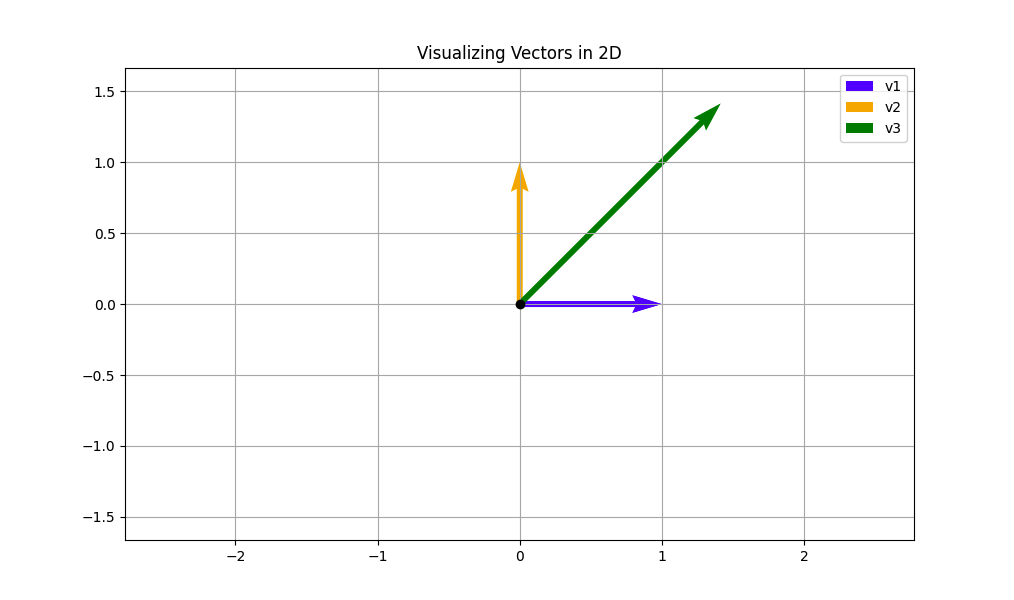

Here is the visual representation of the vectors v1, v2, and v3 that you worked with in the previous example. The tail of each vector arrow always starts at the origin, while the tip is located at coordinates specified by the vector.

The following key inferences can be drawn from this visual:

V1 and v2 are unit vectors because their magnitude, given by the arrow length, is one.

V1 and v2 are orthogonal because their tails meet at a 90 degree angle. You can see this visually but can also verify it computationally by computing the dot product between them.

V3 exhibits a 45-degree angle with both v1 and v2. As a result, v3 will possess a non-zero dot product when compared to both vectors. Additionally, this implies that V3 shares an equal relationship with V1 as well. Generally speaking, when two vectors have a smaller angle, they tend to point towards a common direction.

With this understanding, you're ready to delve deeper into the concept of vector similarity. If you only take one

In [43]:
track_list = []
for i in range(start,end):
    if len(store_data["Text_Index"][0][i].split(" ")) <= 5 and '<image>' not in store_data["Text_Index"][0][i]:
        continue
    if store_data["Text_Index"][0][i] in track_list:
        continue
    track_list.append(store_data["Text_Index"][0][i].replace("\n",""))
    if '<image>' in store_data["Text_Index"][0][i]:
        display_image(store_data["Text_Index"][0][i][7:])
    elif '<code>' in store_data["Text_Index"][0][i]:
        print("========================Code========================")
        print(store_data["Text_Index"][0][i][6:])
        print("========================Code========================")
        print()
    else:
        print(sky(store_data["Text_Index"][0][i].replace("\n",""),"Can you summarize in short?"))
        print()
    